In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# Load the dataset (replace with the path of your dataset)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'  # Example updated URL, verify if correct
df = pd.read_csv(url, header=None, names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

In [5]:
# Display basic info about the dataset
print("Dataset Info:\n", df.info())
print("\nFirst 5 rows:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
Dataset Info:
 None

First 5 rows:
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0

In [6]:
# Define feature and target variables
X = df.drop(columns=['num'])  # Drop target column
y = df['num']  # Target variable is 'target'

In [7]:
# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [8]:
# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize numerical features
])

In [9]:
# Categorical pipeline (if needed)
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

In [10]:
# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [11]:
# Define full pipeline with feature selection and PCA
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),  # Feature selection using ANOVA F-test
    ('pca', PCA(n_components=5)),  # Apply PCA to reduce dimensionality to 5 components
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest Classifier
])

In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak',
                                                   'slope']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ca', 'thal'])])),
                ('feature_selection', SelectKBest(k='all')),
                ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [14]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.5738


In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27  1  1  0  0]
 [ 5  4  1  2  0]
 [ 2  1  3  3  0]
 [ 2  1  3  1  0]
 [ 1  1  0  2  0]]


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

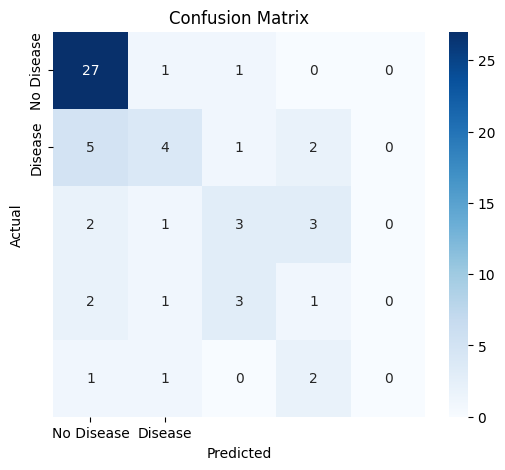

In [18]:
# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
# Display PCA components
processed_features = pipeline.named_steps['pca'].components_
print("\nPCA Processed Features:")
print(processed_features)


PCA Processed Features:
[[-3.23739501e-01 -8.34653835e-02 -2.95265389e-01 -2.00495177e-01
  -8.67065998e-02 -5.00686585e-02 -1.99742691e-01  4.29951440e-01
  -3.64940404e-01 -4.24288914e-01 -3.96559548e-01  1.08645886e-01
  -3.36737196e-02 -4.76970528e-02 -3.41803548e-02  6.90524095e-03
   1.51477039e-01 -2.66421874e-02 -1.24579107e-01 -2.55744351e-04]
 [ 3.86289625e-01 -3.76827517e-01 -2.39205384e-01  4.73759846e-01
   4.08356243e-01  2.55972119e-01  2.81995088e-01  1.00566563e-01
  -2.81953658e-01 -8.36734098e-02 -5.85859839e-02 -2.83760248e-02
  -1.17545246e-02  3.46587925e-02  1.14733380e-02 -6.00158111e-03
   8.40809751e-02 -5.55909778e-03 -7.65120877e-02 -2.00978962e-03]
 [-6.22621142e-02  4.26268660e-01 -4.33618124e-01  3.14494676e-01
  -3.76268178e-01  4.45111402e-01 -1.28647217e-01  1.67506922e-01
  -1.38310647e-01  2.24202511e-01  2.21106503e-01  2.60701229e-02
  -3.92171165e-02  1.70201855e-02 -1.08102859e-02  6.93709412e-03
  -1.20037278e-01  4.07975155e-02  7.83913647e-02

In [20]:
# Display feature selection scores
select_k_best = pipeline.named_steps['feature_selection']
print("\nFeature Selection Scores:")
print(select_k_best.scores_)


Feature Selection Scores:
[ 4.89720608  5.0495114  12.99411259  2.52293335  1.21717734  3.26404618
  2.82301711 11.0088539  14.34885512 20.98859917  9.16694179 17.54666836
  3.65792675 12.19672806  6.70963918  0.5953935  20.72297749  2.19526109
 17.3758075   0.84579264]


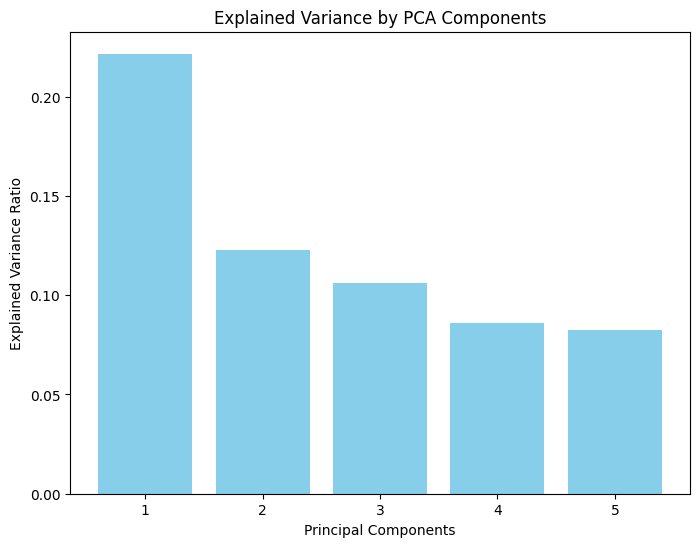

In [21]:
# PCA Explained Variance
pca = pipeline.named_steps['pca']
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.show()

In [22]:
# Feature Importance from Random Forest
rf = pipeline.named_steps['classifier']  # Access the RandomForestClassifier directly
importances = rf.feature_importances_

In [23]:
# Get feature names after preprocessing
num_features_after = num_features
cat_features_after = pipeline.named_steps['preprocessing'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(cat_features)

In [24]:
# Combine all feature names
all_feature_names = pipeline.named_steps['pca'].get_feature_names_out()

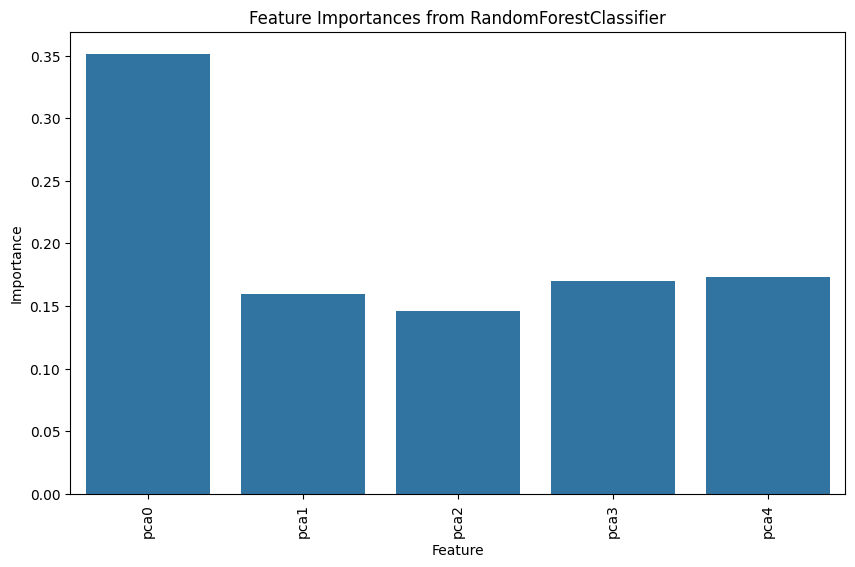

In [25]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=all_feature_names, y=importances)
plt.xticks(rotation=90)
plt.title('Feature Importances from RandomForestClassifier')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()